In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("../data/train.tsv", sep="\t", encoding = "utf-8", header=None)
test_df = pd.read_csv("../data/test.tsv", sep="\t", encoding = "utf-8", header=None)
dev_df = pd.read_csv("../data/dev.tsv", sep="\t", encoding = "utf-8", header=None)

train_df.columns = ['text', 'emotions', 'id']
test_df.columns = ['text', 'emotions', 'id']
dev_df.columns = ['text', 'emotions', 'id']

In [3]:
train_df['emotions'] = list(map(lambda s : list(map(int, s.split(','))), train_df['emotions']))
test_df['emotions'] = list(map(lambda s : list(map(int, s.split(','))), test_df['emotions']))
dev_df['emotions'] = list(map(lambda s : list(map(int, s.split(','))), dev_df['emotions']))

In [4]:
def emotions_to_ekman(df):
    # anger disgust fear joy sadness surprise neutral
    ekman = [3, 3, 0, 0, 3, 3, 5, 5, 3, 4, 0, 1, 4, 3, 2, 3, 4, 3, 3, 2, 3, 3, 5, 3, 4, 4, 5, 6]
    res = []

    for i in df['emotions']:
        tmp = [0, 0, 0, 0, 0, 0, 0]
        for j in i:
            tmp[ekman[j]] = 1
        res.append(tmp)
    tmp_df = pd.DataFrame(res, columns=['angry', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral'])
    
    return tmp_df

In [5]:
train_df = pd.concat([train_df, emotions_to_ekman(train_df)], axis=1)
test_df = pd.concat([test_df, emotions_to_ekman(test_df)], axis=1)
dev_df = pd.concat([dev_df, emotions_to_ekman(dev_df)], axis=1)

In [6]:
train_df = train_df.drop(columns=['emotions', 'id'])
test_df = test_df.drop(columns=['emotions', 'id'])
dev_df = dev_df.drop(columns=['emotions', 'id'])

In [9]:
!pip install seaborn

In [11]:
import seaborn as sns

In [13]:
emos = ['angry', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
cnt = [sum(train_df[i]) for i in emos]

In [14]:
df = pd.DataFrame({'emotion': emos, 'count': cnt})

In [16]:
cnt

[5579, 793, 726, 17410, 3263, 5367, 14219]

<Axes: xlabel='emotion', ylabel='count'>

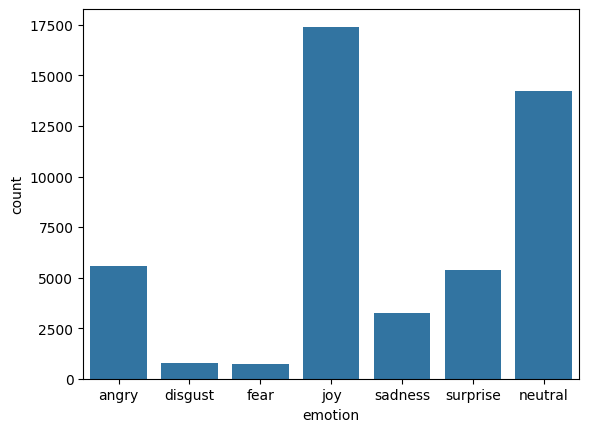

In [15]:
sns.barplot(x='emotion', y='count', data=df)